# Matplotlibでグラフを描画しよう 

## Matplotlibとは 

- Matplotlibとは主に2次元のデータを可視化するためのサードパーティ製パッケージである。動作するOSを選ばないこと、詳細な描画設定ができること、多様な出力形式に対応していることから定番の可視化ツールとして広く使われている。
- Matplotlibユーザが多い理由としては、数値解析ソフトウェアであるMATLABと同様の描画をPythonで行える点が挙げられる。

## グラフ描画の基礎

- Matplotlibでグラフを描画するためにmatplotlib.pyplotモジュールをインポートする。エイリアス名はMatplotlib公式ページではpltに指定されている。

In [1]:
import matplotlib.pyplot as plt

- Jypyter NotebookにMatplotlibのグラフを出力するには、show()関数を利用する。show()関数によって、コードを入力したコードセル直下に図がインライン表示される。

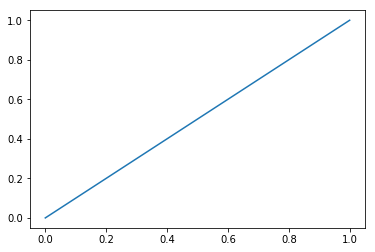

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)

dat = [0, 1]
ax.plot(dat)

# 図をインライン表示
plt.show()

- Matplotlibではグラフを描画する前に「フィギュアオブジェクト（フィギュア）」と「サブプロット」を生成する必要がある。サブプロットは最低でも1つ作成する必要がある。フィギュアはサブプロットを描画する領域であり、サブプロットはグラフを描画するための領域である。
- フィギュアにサブプロットを追加する方法としては、Figure.add_subbplot()メソッドとpyplot.subplots()関数を利用する方法がある。

- 最初にfigure()関数でFigureクラスのインスタンス（「フィギュア」）を生成し、次にadd_subplot()メソッドでサブプロットをフィギュアの指定された位置に配置するコードが次である：

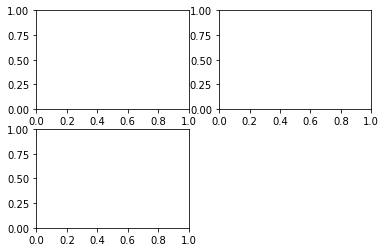

In [3]:
# フィギュアの生成
fig = plt.figure()

# フィギュア内にサブプロットを3つ配置する
# 2行2列の1番
ax1 = fig.add_subplot(221)
# 2行2列の2番
ax2 = fig.add_subplot(222)
# 2行2列の3番
ax3 = fig.add_subplot(223)

plt.show()

- add_subplot()関数のカッコ内の数字は「総行数」「総列数」「サブプロット番号」を表す。サブプロット番号は次のような順序で振られる：

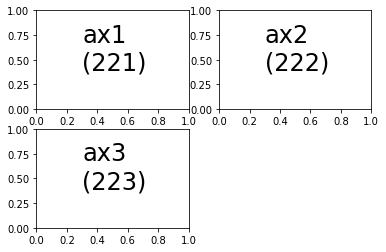

In [6]:
fig = plt.figure()

# サブプロットの作成
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

# 番号記述
for i, ax in enumerate([ax1, ax2, ax3], start=1):
    txt = 'ax{0}\n(22{0})'.format(i)
    ax.text(0.3, 0.4, txt, fontsize=24)
    
plt.show()

- add_subplot()メソッドの引数には221や223などの3桁の整数を1つ指定するほかに、整数を3つ指定する方法もあるが、この記法は繰り返し処理などで変数を利用してサブプロットを描画する際に役に立つ：

In [7]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

C:\Users\juvet\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


- （フィギュアも一緒にではなく）サブプロットのみを描画する方法としてadd_subplot()メソッドがあったが、フィギュア生成と同時にサブプロットの配置を行う方法（pyplot.subplots()関数を用いる方法）もある。

<class 'numpy.ndarray'> [[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA5F561EF0>


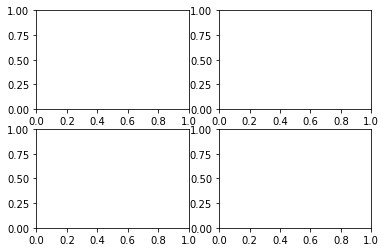

In [9]:
fig, axes = plt.subplots(2, 2)

print(type(axes), axes)
plt.show()

- subplot()関数を利用してサブプロットを追加した場合は、axesに対して、[1, 0]のように、行列の位置を指定してサブプロットを参照できる。行列の指定は0から始める点に注意。

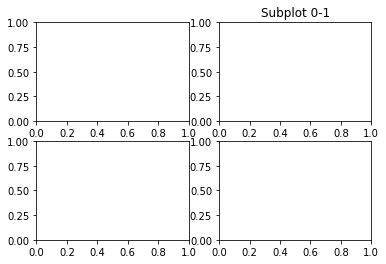

In [11]:
# 1行2列目のサブプロットにサブプロットタイトルを指定
fig, axes = plt.subplots(2, 2)
axes[0, 1].set_title('Subplot 0-1')
plt.show()

- スタイルとは、グラフの線の太さや色など、グラフの「体裁」に関する情報をまとめたものである。スタイルはstyle.use()関数で適用できる。ggplotスタイルは値の解説がしやすい。

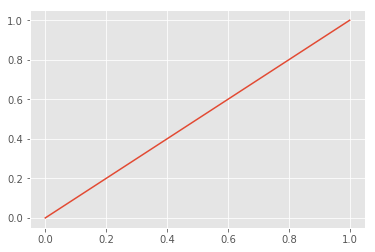

In [13]:
# スタイルの適用
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111)

dat = [0 ,1]
ax.plot(dat)

plt.show()

- 折れ線グラフはプロットされた点と点を直線で接続（線形補間）したグラフである。折れ線グラフはAxes.plot()メソッドを使用して描画する。plot()メソッドの引数が1つのみの場合、与えられた引数はY軸の値として設定され、X軸の値は自動的に「最小値＝0」「最大値＝リストの要素数-1」の整数列が出力される。

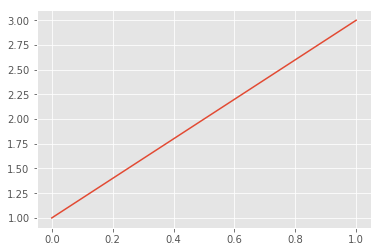

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, 3])

plt.show()

- plot()関数の引数に渡す、描画対象のデータとしては、リスト以外にも次のようなデータ型が渡せる：
    - タプル
    - numpy.ndarray
    - pandas.Series
- リストを含め、これらを便宜上リストライクオブジェクトと呼ぶ。

- X軸とY軸の両方に値を与えるには、第一、第二引数にそれぞれX値、Y値を与える：

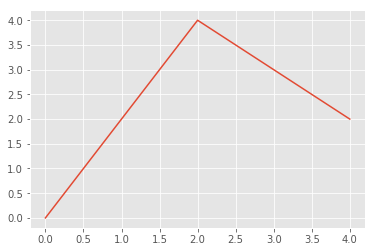

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = [0, 2, 4]
y = [0, 4, 2]

ax.plot(x, y)

plt.show()

- 複数の線を描画したい場合、plot()メソッドを複数回実行することで1つのサブプロットに複数のグラフを重ねることができる：

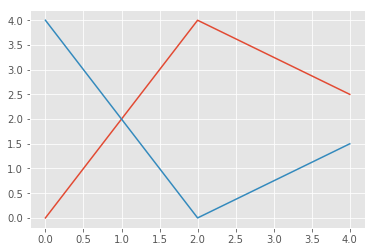

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = [0, 2, 4]
y1 = [0, 4, 2.5]
y2 = [4, 0, 1.5]

# 2本の線を描画
ax.plot(x, y1)
ax.plot(x, y2)

plt.show()

- データとして、株価騰落率が時系列で記録されているanime_stock_returns.csvファイルを利用してグラフを描画する：

In [24]:
import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_stock_returns_csv = os.path.join(base_url, 'anime_stock_returns.csv')

df = pd.read_csv(anime_stock_returns_csv, index_col=0, parse_dates=['Date'])
df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,1.000000,1.000000
2015-01-02,1.000000,1.000000
2015-01-05,1.011695,1.014082
2015-01-06,1.001463,1.000000
2015-01-07,0.982457,1.000824


- 時系列の情報を含むデータを表現するには、折れ線グラフが適している。Matplotlibで折れ線グラフを出力してみる。

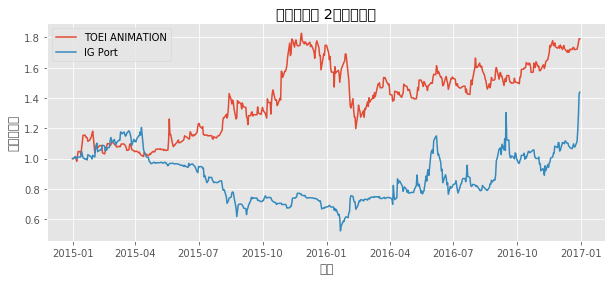

In [25]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

# データと凡例を指定
ax.plot(df.index, df['TOEI ANIMATION'], label='TOEI ANIMATION')
ax.plot(df.index, df['IG Port'], label='IG Port')

# タイトル、軸ラベルを指定
ax.set_title('株価騰落率 2年間の推移')
ax.set_ylabel('株価騰落率')
ax.set_xlabel('年月')

# 凡例を有効化
ax.legend()

plt.show()

- 2軸を持つグラフを描画したいとき（X軸を共有して2つのY軸を持つ図を作成する場合とY軸を共有して2つのX軸をもつ図を描画する場合）、それぞれAxes.twinx()メソッドとtwiny()メソッドを使用する。次ではtwinx()メソッドを使用して株価（close）と出来高（volume）を1つのグラフに示しているが、株価は折れ線グラフで、出来高は棒グラフで示すのが一般的である：

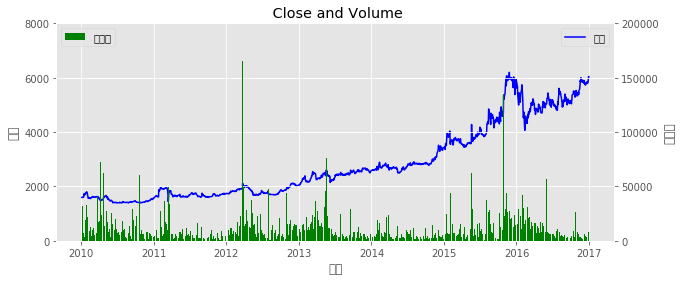

In [27]:
t4816_csv = os.path.join(base_url, '4816.csv')
df = pd.read_csv(t4816_csv, index_col=0, parse_dates=['Date'])

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111)

ax1.plot(df.index, df['Close'], color='b', label='株価')

# X軸を共有しY軸を2つ使用する設定
ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='g', label='出来高', width=2)

# 軸と軸ラベルの設定
ax1.set_yticks([i * 2000 for i in range(5)])
ax1.set_ylabel('株価')
ax2.set_yticks([i * 50000 for i in range(5)])
ax2.set_ylabel('出来高')
ax1.set_xlabel('年月')

# グラフタイトルの設定
ax1.set_title(' Close and Volume')

# 凡例の設定
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

## 散布図

- 散布図はAxes.scatter()メソッドを用いて描画する。次のように、scatter()メソッドの第一引数と第二引数にそれぞれX値とY値を与える。データとしてはリストライクオブジェクトが使用できる。

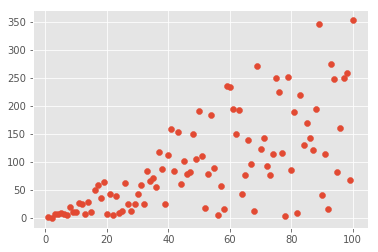

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# 入力値の生成
np.random.seed(2)
x = np.arange(1, 101)
y = 4 * x * np.random.rand(100)

# 散布図の描画
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y)

plt.show()

- 実際のデータを活用してグラフを描画する。データはanime_master.csvファイルを利用する。

In [33]:
import os
import pandas as pd

base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')

df = pd.read_csv(anime_master_csv)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


- anime_idを（引数index_colに指定することで）インデックスに設定する。

In [34]:
df = pd.read_csv(anime_master_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


- X値としてmembersを、Y値としてratingを指定することにより散布図を作成できる。描画された記号を半透明にする値（alpha=0.5）も設定する：

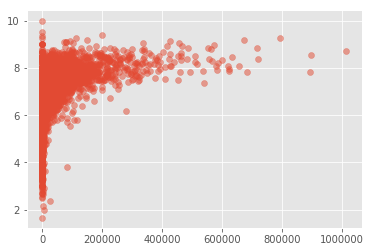

In [35]:
fig = plt.figure()
ax  =fig.add_subplot(111)

ax.scatter(df['members'], df['rating'], alpha=0.5)
plt.show()

- メンバ数（members）とレーティング（rating）の間に明確な相関関係は無かったものの、メンバ数の増加に伴いレーティングが8付近に収束してくる傾向が読み取れる。
- また、メンバ数が80万以上のアニメが3つあることが分かる。これを調べると次のようになる：

In [36]:
# membersの値でデータを絞り込み
df.loc[df['members'] >= 800000, ['name', 'members']]

,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


- 次に、メンバ数の範囲を広げ、かつ複数の条件でアニメを検索する：

In [37]:
df.loc[(df['members'] >= 600000) & (df['rating'] >= 8.5), ['name', 'rating']]

,name,rating
anime_id,,
5114,Fullmetal Alchemist: Brotherhood,9.26
9253,Steins;Gate,9.17
1575,Code Geass: Hangyaku no Lelouch,8.83
1535,Death Note,8.71
16498,Shingeki no Kyojin,8.54


- 先のDataFrameを引き続き利用する。typeという列があったが、これはアニメ作品の配給種別を意味する。まずtypeの重複の無いリストを作成する。

In [39]:
types = df['type'].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

- 折れ線グラフと同様、1つのサブプロットに重ねて散布図を描画する。配給種別ごとに一致するデータを抽出し描画する。配給種別は6つあるため、次の図では6つのデータセットがプロットされている：

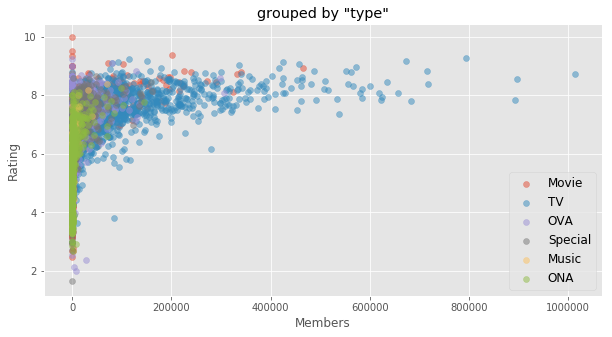

In [41]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

for t in types:
    x = df.loc[df['type'] == t, 'members']
    y = df.loc[df['type'] == t, 'rating']
    
    ax.scatter(x, y, alpha=0.5, label=t)
    
ax.set_title('grouped by "type"')
ax.set_xlabel('Members')
ax.set_ylabel('Rating')

ax.legend(loc='lower right', fontsize=12)

plt.show()

## 棒グラフ 

- 棒グラフはAxes.bar()メソッドを使用して描画する。次ではbar()の第一、第二引数にそれぞれX値、Y値を与えている。データとしてはリストライクオブジェクトが利用できる。

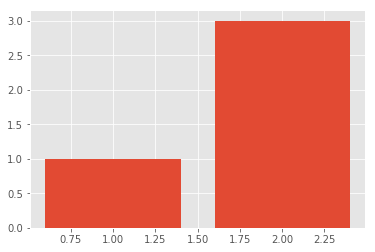

In [42]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)

x = [1, 2]
y = [1, 3]

ax.bar(x, y)

plt.show()

- 目盛ラベルを付けたい場合、次のようにX値を与え、引数tick_labelに目盛ラベルを設定して描画する。

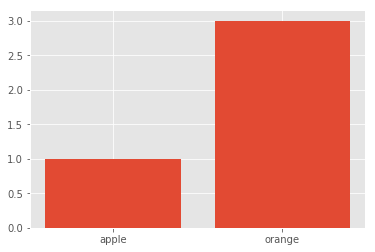

In [43]:
# 横軸の目盛りにラベルを設定
fig = plt.figure()
ax = fig.add_subplot(111)

labels = ['apple', 'orange']
ax.bar(x, y, tick_label=labels)

plt.show()

- 描画後に目盛ラベルを付けたい場合は、Axes.set_xticks()メソッドでX軸目盛を設定し、Axes.set_xticklables()メソッドで目盛りラベルを設定する。

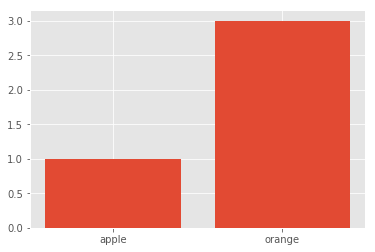

In [44]:
# 描画
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x, y)

# X軸の軸目盛と軸目盛ラベル設定
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

- 横向きの棒グラフはAxes.barh()メソッドを用いて描画する。barh()メソッドの引数は基本的にbar()と同じである。

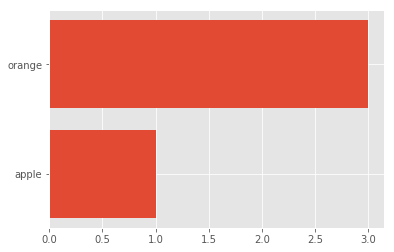

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.barh(x, y, tick_label=labels)

plt.show()

- 実際のデータを利用してグラフを描画する。データはanime_master.csvファイルを使用する。

In [47]:
anime_master_csv = os.path.join(base_url, 'anime_master.csv')

dfac = pd.read_csv(anime_master_csv)
dfac.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


- 棒グラフは数量の大小を可視化するのに適している。ここでは作品の配給種別ごとにメンバ数の合計値を算出し、棒グラフとして描画する。
- 次ではX値に配給種別、Y値に配給種別ごとの合計メンバ数を与えて描画している。配給種別ではテレビ作品のメンバ数が突出していることが確認できる（「1e8」は軸ラベルの数値に10の8乗を乗じた数値であることを示している）。

range(0, 6)
type
Movie       23651929
Music         617419
ONA          2601477
OVA         13233285
Special     11263162
TV         139301607
Name: members, dtype: int64


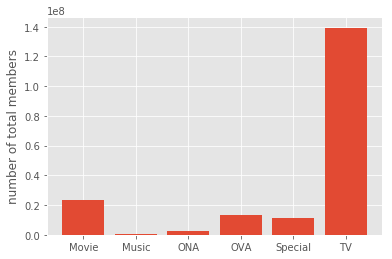

In [53]:
fig = plt.figure()
ax  =fig.add_subplot(111)

y = dfac.groupby('type').sum()['members']
x = range(len(y))

print(x)
print(y)

xlabels = y.index
ax.bar(x, y, tick_label=xlabels)
ax.set_ylabel('number of total members')

plt.show()

In [54]:
dfac.groupby('type').sum()

,anime_id,episodes,rating,members
type,,,,
Movie,31795901,2444,14049.49,23651929
Music,10910129,546,2708.20,617419
ONA,13438158,4006,3327.11,2601477
OVA,23585262,4926,12510.12,13233285
Special,25489152,3786,9899.30,11263162
TV,36395417,124729,23073.44,139301607


- 複数グループの棒グラフを作成する場合は工夫が必要である。複数回bar()を実行すると、最初に描画されたオブジェクトが上書きされてしまう。

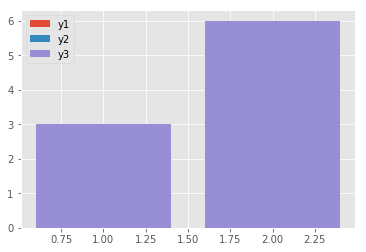

In [55]:
import numpy as np

# データセットの作成
x = [1, 2]
y1, y2, y3 = [1, 2], [2, 4], [3, 6]

# 複数グループの棒グラフの描画（うまくいかない例）
fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2
ax.bar(x, y1, label='y1')
ax.bar(x, y2, label='y2')
ax.bar(x, y3, label='y3')

ax.legend()

plt.show()

- 上を回避するためには、X値を棒の横幅分ずらして描画する必要がある。次は棒の横幅wを0.2に設定しX値を0.2ずつずらして描画している例である。
- pandasのplot.bar()メソッドを用いる方法が簡素な記述で複数グループの棒グラフを描画できる。

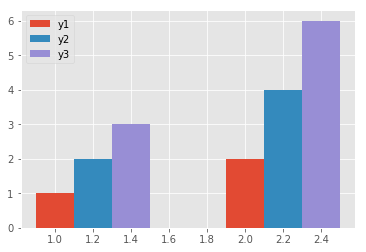

In [60]:
# 複数グループの棒グラフの描画（うまくいく例）

fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2
ax.bar(x, y1, width=w, label='y1')
ax.bar(np.array(x) + w, y2, width=w, label='y2')
ax.bar(np.array(x) + w * 2, y3, width=w, label='y3')

ax.legend()

plt.show()

In [59]:
np.array(x) + w

array([1.2, 2.2])

- 実際のデータを利用してグラフを描画する。データはanime_genre_top10_pivoted.csvファイルを使用する。

In [61]:
anime_genre_top10_pivoted_csv = os.path.join(base_url, 'anime_genre_top10_pivoted.csv')
dfag = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')
dfag

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


- 次では描画したデータを可視化しているが、X値を0.1ずつ増加しながら描画している。この結果からTVののべメンバ数が突出していることが分かる。

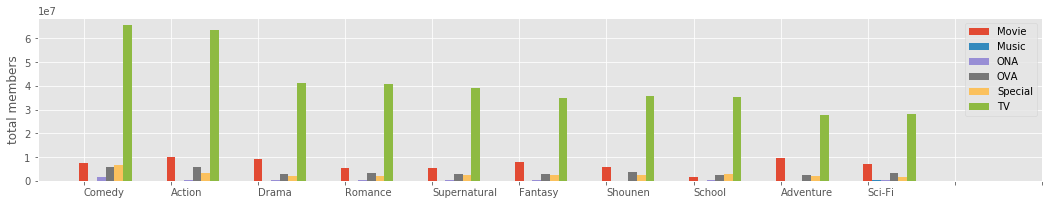

In [68]:
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

# 0から9までの整数から成るarray
wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=i)
    wt = wt + w

ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('total members')
ax.legend()

plt.show()

- 上ではMusicやONAの値が相対的に小さいため、視認するのが難しくなっている。このような場合は対数軸を使うとよい。Y軸を対数軸に設定するには、set_yscale()メソッドにlogを指定する。

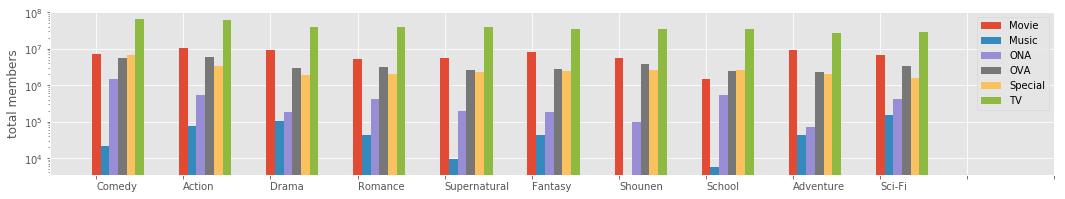

In [69]:
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=i)
    wt = wt + w

ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('total members')
# 上との違い
ax.set_yscale('log')
ax.legend()

plt.show()

## ヒストグラム

- ヒストグラムは縦軸に度数（値の出現頻度）、横軸に階級（上限値～下限値の幅）をとったグラフであり、データの分布の形状を視認するために用いられる。
- ヒストグラムはAxes.hist()メソッドを使用して作成する。メソッドに渡すデータにはリストライクオブジェクトが利用できる。次は平均値100、標準偏差10の正規分布に従う1万個のデータのヒストグラムである：

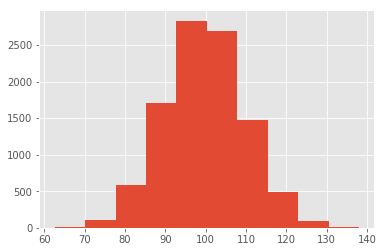

In [70]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# データセットの作成
mu = 100
sigma = 10
np.random.seed(0)
x = np.random.normal(mu, sigma, 10000)

# ヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x)

plt.show()

- hist()にはデータの他にも引数を渡すことができる。rwidthでビン（棒）の幅を、binsでビンの本数を指定する。ビンの幅のより詳細な設定は後述する。

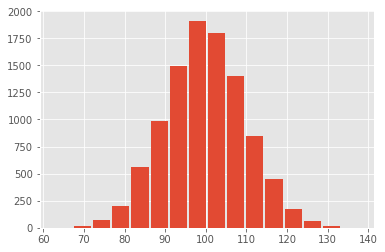

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)

plt.show()

- 実際のデータを利用してグラフを描画する。anime_master.csvファイルを利用する。

In [72]:
import os
import pandas as pd

anime_master_csv = os.path.join(base_url, 'anime_master.csv')

df = pd.read_csv(anime_master_csv, index_col = 'anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


- レーティングの分布についてMatplotlibで可視化を行う。pandasのSeriesをhist()メソッドの引数に渡す。レーティングが0から10の範囲で行われているため、値の範囲を0~10に指定する。結果からは6~7のデータが最も多いこと、0~3や9~10のデータは極端に少ないことが確認できる。

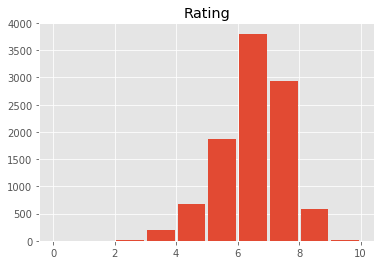

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], range=(0, 10), rwidth=0.9)
ax.set_title('Rating')

plt.show()

- エピソード数も可視化してみる。エピソード数は映画の場合は基本的に1になる。ここではエピソード数のばらつきが大きいと期待されるTVに限定して可視化する。結果は左に大きく偏ったヒストグラムになった：

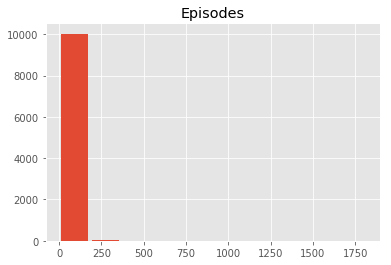

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_tv = df[df['type'] == 'TV']

ax.hist(df['episodes'], rwidth=0.9)
ax.set_title('Episodes')

plt.show()

- このような場合（ごく少数、極端に話数の多い作品がある場合）、ヒストグラムの範囲指定が有効である。次を実行するとデータの状況がよく見えるようになる。結果は、テレビアニメは放送枠の都合上1クール（10~13話程度）または2クールの作品が多いという背景があるがそれを裏付ける分布となった。

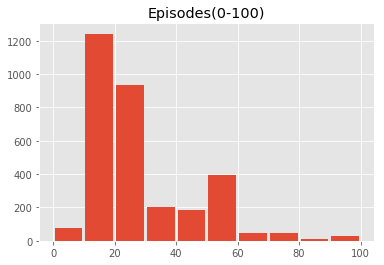

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

# rangeの値を(0, 100)に指定
ax.hist(df_tv['episodes'], rwidth=0.9, range=(0, 100))
ax.set_title('Episodes(0-100)')

plt.show()

- 引数orientationに「horizontal」（デフォルトは「vertical」）を指定すると横向きのヒストグラムが描画される。

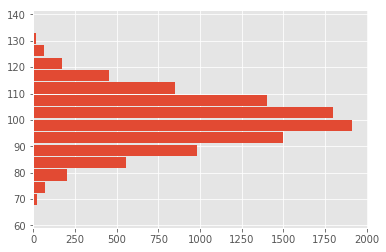

In [89]:
np.random.seed(0)
x = np.random.normal(100, 10, 10000)

fig = plt.figure()
ax = fig.add_subplot(111)

# orientationをhorizontalに指定
ax.hist(x, rwidth=0.9, bins=16, orientation='horizontal')

plt.show()

- データ数が異なるグループのヒストグラム同士を比較する場合は、相対度数を用いてヒストグラム化すると比較が容易になる。相対度数のヒストグラムを描画するには、densityにTrueを指定する。

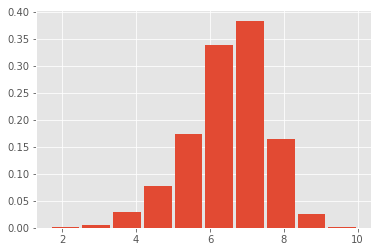

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)

# normedをTrueに指定
ax.hist(df['rating'], density=True, rwidth=0.9)

plt.show()

- 累積度数を確認する場合には累積ヒストグラムを用いる。累積ヒストグラムを描画する場合は引数cumulativeにTrueを指定する。

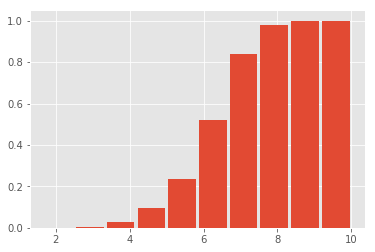

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], density=True, cumulative=True, rwidth=0.9)

plt.show()

- binsオプションにリスト型の数列を与えることで階級幅を指定できる。階級幅は等間隔でなくともかまわない。

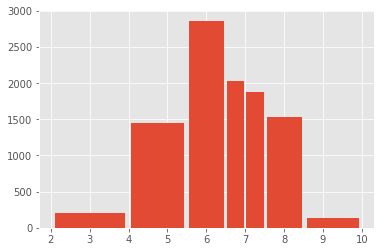

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins=[2, 4, 5.5, 6.5, 7, 7.5, 8.5, 10], rwidth=0.9)

plt.show()

- 近似曲線はヒストグラムを描画したのちに折れ線グラフで描画する。ここでは正規分布を用いて近似する。

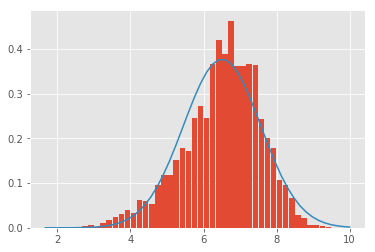

In [99]:
# ビン数
bins = 50
# データの最小値
dfmin = np.min(df['rating'])
dfmax = np.max(df['rating'])

# ヒストグラムの描画
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.hist(df['rating'], bins = bins, range=(dfmin, dfmax), density=True, rwidth=0.9)

# 平均と標準偏差
mu, sigma = df['rating'].mean(), df['rating'].std()

# 各ビンの区切りの値（ビンの上限値と下限値）を得る
x = np.linspace(dfmin, dfmax, bins)

# 近似的な確率密度関数を使用してY値を生成
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

# 近似曲線の描画
ax.plot(x, y)
plt.show()

- 複数グループのヒストグラムを重ねて描画することができる。同じサブプロットにヒストグラムを繰り返し描画することでできる。

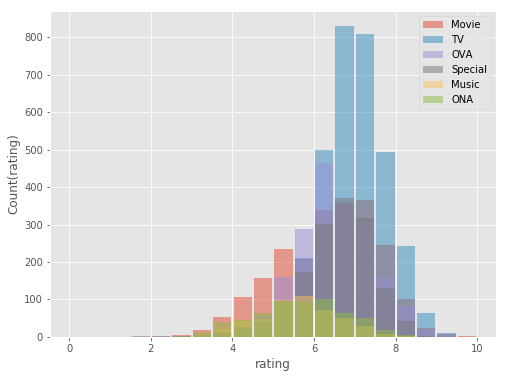

In [104]:
types = df['type'].unique()
labels = types.tolist()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# ratingが0~10で行われているため0~10で用意
b_num = np.arange(0, 10.5, 0.5)

# ヒストグラムが重ねて描画されるため不透明度alphaを下げる
for t in types:
    ax.hist(df.loc[df['type'] == t, 'rating'],
           bins=b_num,
           rwidth=0.9,
           alpha=0.5,
           label=t)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

- 複数グループのヒストグラムを重ねて描画すると視認性に欠ける場合はグループを並べる方法がある。入れ子のリストを作成するのがポイント：

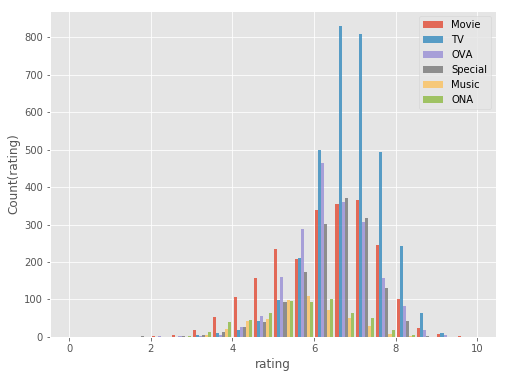

In [107]:
# データセットの作成
dataset = [df.loc[df['type'] == t, 'rating'] for t in types]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.hist(dataset,
        bins=np.arange(0, 10.5, 0.5),
        rwidth=0.9,
        alpha=0.8,
        label=labels)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

## 箱ひげ図

- 箱ひげ図はデータのばらつきを分かりやすく表現するためのグラフである。箱の両端は、上からそれぞれ第3四分位点、第1四分位点を表し、中央の線は中央値を示す。箱の長さ（四分位範囲）すなわち$Q_3 - Q_1$を用いてひげの上下の両端はそれぞれ$Q_3 + 1.5 * (Q_3 - Q_1), Q_1 - 1.5 * (Q_3 - Q_1)$と表せる。
- 箱ひげ図はAxes.boxplot()メソッドを使用して作成する。メソッドに渡すデータとしてリストライクオブジェクトが利用できる。1次元のデータを与えると箱ひげ図が1つ出力される。

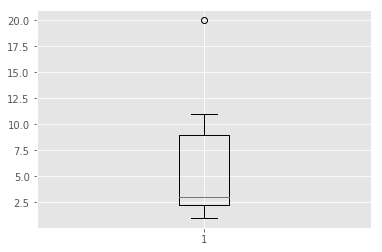

In [109]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = [1, 2, 3, 3, 11, 20]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(x)

plt.show()

- 複数のリストを与えると複数の箱ひげ図が描画できる。次は2つの箱ひげ図の例：

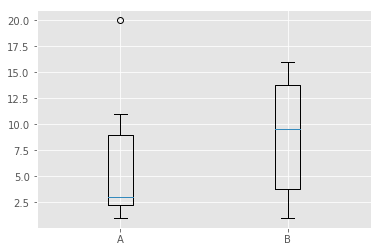

In [110]:
x = [[1, 2, 3, 3, 11, 20], [1, 2, 9, 10, 15, 16]]
labels = ['A', 'B']

fig = plt.figure()
ax = fig.add_subplot(111)

# データとラベルを指定
ax.boxplot(x, labels=labels)

plt.show()

- 実際のデータを利用してグラフを描画する。データはヒストグラムの時と同じanime_master.csvファイルを利用する。

In [111]:
df.head(3)

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


- 配給種別（各typeごと）にエピソード数の箱ひげ図を描画する。配給種別は6つあるため6つの箱ひげ図が出力される。

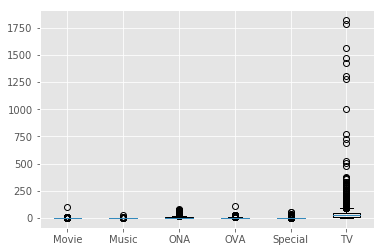

In [114]:
labels = []
types_list = []

# 配給種別ごとのエピソード数の情報をリスト化
for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())
    
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

plt.show()

- これでは詳細がわかりづらいため、箱ひげ図の描画範囲を制限（エピソード数を100までに）してみる：

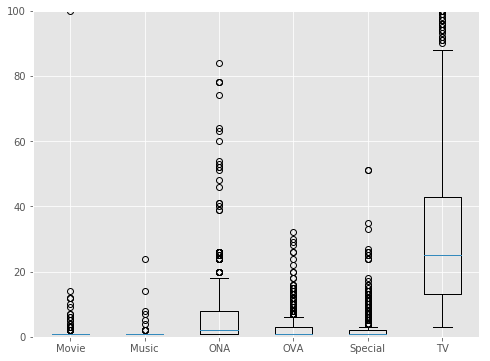

In [115]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

# Y軸の描画範囲を0から100までに限定
ax.set_ylim(0, 100)

plt.show()

- テレビアニメのエピソード数は中央値が25話付近であることや、90話以上は外れ値として検討できることが確認できる。
- 四分位点の具体的な値を知りたい場合は、pandasのDataFrameクラスのdescribe()メソッドを利用する。次の表のように、第1~3四分位点までの値が箱ひげ図の内容と一致していることが分かる。

In [117]:
df['episodes'][df['type'] == 'TV'].describe().round(1)

count    3330.0
mean       37.5
std        83.3
min         3.0
25%        13.0
50%        25.0
75%        43.0
max      1818.0
Name: episodes, dtype: float64

項目 | 説明
------------ | ------------
color | 色
facecolor | 塗りつぶし色
linestyle | 線種
linewidth | 線の太さ
marker | マーカー
markerfacecolor | マーカーの塗りつぶし色
markeredgecolor | マーカーの枠線の色
markersize | マーカーの大きさ

- ボックスごとに書式を設定することが可能である。それに際し、箱ひげ図の主な書式設定項目（上表）のそれぞれにsetを付けて用いる。次の箱ひげ図では、以下のような流れで書式を設定して描画している。
    1. 図を描画する
    2. ボックスの要素数と同じ要素数の色のセット（カラーセット）（colors1, colors2）を作成する
    3. 上側と下側に分かれている要素の書式設定用に数列のリストnを作成する
    4. 箱と外れ値、中央値（要素が上下に分かれていないもの、　あるいは上下で同じ色を与えるもの）の書式設定をする

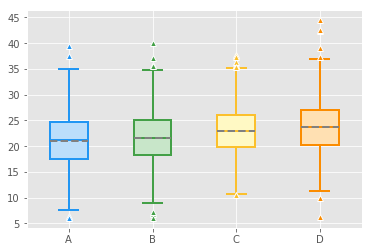

In [135]:
# 図の描画

fig = plt.figure()
ax = fig.add_subplot(111)

# データセットの作成
np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000) for mu in range (1, 5)]

bp = ax.boxplot(dataset, patch_artist='Patch', labels=['A', 'B', 'C', 'D'], meanline=True, showmeans=True)

# カラーセット
color1 = ['#2196F3', '#43A047', '#FBC02D', '#FB8C00']
color2 = ['#BBDEFB', '#C8E6C9', '#FFF9C4', '#FFE0B2']

# 上下に分かれた要素に設定するための数列
n = [0, 0, 1, 1, 2, 2, 3, 3]

# 書式設定
# 箱と外れ値、中央値の書式設定
for params in zip(bp['boxes'],
                  bp['fliers'],
                  bp['medians'],
                  colors1,
                  colors2):
    bpb, bpf, med, color1, color2 = params

    # 箱の書式設定
    bpb.set_color(color1)
    bpb.set_facecolor(color2)
    bpb.set_linewidth(2)
    
    # 外れ値の書式設定
    bpf.set(marker='^', color=color2)
    bpf.set_markeredgecolor("white")
    bpf.set_markerfacecolor(color1)
    
    # 中央値の書式設定
    med.set_color(color1)
    med.set_linewidth(2)
    
# ひげとひげの末端キャップの書式設定
for bpc, bpw, m in zip(bp['caps'], bp['whiskers'], n):
    bpc.set_color(colors1[m])
    bpc.set_linewidth(2)
    bpw.set_color(colors1[m])
    bpw.set_linewidth(2)
    
# 平均値の書式設定

for mean, color2 in zip(bp['means'], colors2):
    mean.set_color('grey')
    mean.set_linewidth(2)
    mean.set_linestyle('--')
    
plt.show()

## ファイル出力

- ファイルの出力にはsavefig()関数を使用する。次のようにファイル名を与えることでファイルに出力できる。ファイルの保存形式はformatオプションでpng, pdf, ps, eps, svgを指定できるが、ファイル名に保存したい形式に応じた拡張子を付けることで保存形式が自動判別される。

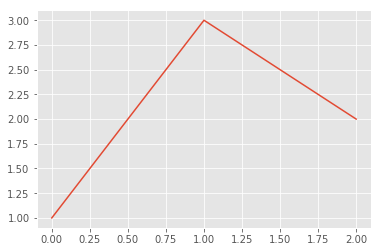

In [137]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

dat = [1, 3, 2]

ax.plot(dat)

fname = 'save_fig.png'
plt.savefig(fname)

plt.show()

- ファイル出力時には背景の塗りつぶし色、枠線の色なども指定できる（下表）。bbox_inchesはtightに指定すると余白を最小限にしてファイルに出力できる。Notebook上では下のようになるが、ファイルに出力されるものはオプションで指定したものになることに注意。

オプション | 意味
------------ | ------------
dpi | 解像度
facecolor | 塗りつぶし色
edgecolor | 枠線の色
format | ファイルの保存形式（png, odf, ps, eps, svg）
transparent | 真偽値
bbox_inches | 出力する図の大きさ、もしくはtight
pad_inches | 余白幅（bbox_inches='tight'の場合）
frameon | 枠線を描画するか否か（真偽値）

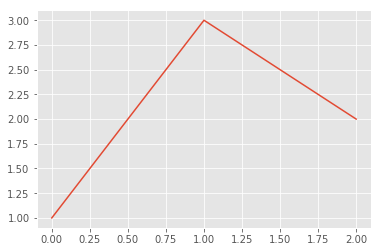

In [138]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

dat = [1, 3, 2]

ax.plot(dat)

fname = 'save_fig_prop_setting.png'

plt.savefig(fname, dpi=300, facecolor='grey',
            edgecolor='k', linewidth=10,
            frameon=True, tight_layout=False)

plt.show()

- 図の凡例や軸タイトルなど、サブプロット周辺にオブジェクトを配置すると、フィギュアオブジェクトからはみ出して、出力時に一部が見切れる場合がある。このようなときsubplot_adjust()関数を使う。左右と下側の余白を大きくとることにより、軸タイトルと凡例がすべて含まれた図が出力されるようになる。余白をとった分サブプロットのサイズが小さくなるため、ファイル出力が必要な場合はあらかじめフィギュアオブジェクトのfigsizeオプションと合わせてサイズを調整する必要がある。

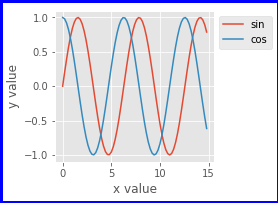

In [143]:
import numpy as np

x = np.arange(0, 15, 0.2)
y = np.sin(x)
z = np.cos(x)

fig = plt.figure(figsize=(4, 3), edgecolor='b', linewidth=5, frameon=True)

ax = fig.add_subplot(111)
ax.plot(x, y, label='sin')
ax.plot(x, z, label='cos')

ax.set_xlabel('x value')
ax.set_ylabel('y value')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# サブプロットのサイズ調整
fig.subplots_adjust(left=0.2, bottom=0.2, right=0.75, top=0.9)

fname = 'save_fig_adjust.png'
plt.savefig(fname, dpi=300, edgecolor='b', linewidth=2, frameon=True)

plt.show()

# 9章 プロットと可視化

MatplotlibはすべてのOSでさまざまなGUIバックエンドをサポートしており、さらに可視化したものを、一般的なベクタ画像形式やラスタ画像形式全てでエクスポートできる。

In [9]:
%matplotlib notebook

## 9.1 Matplotlib APIの概要 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


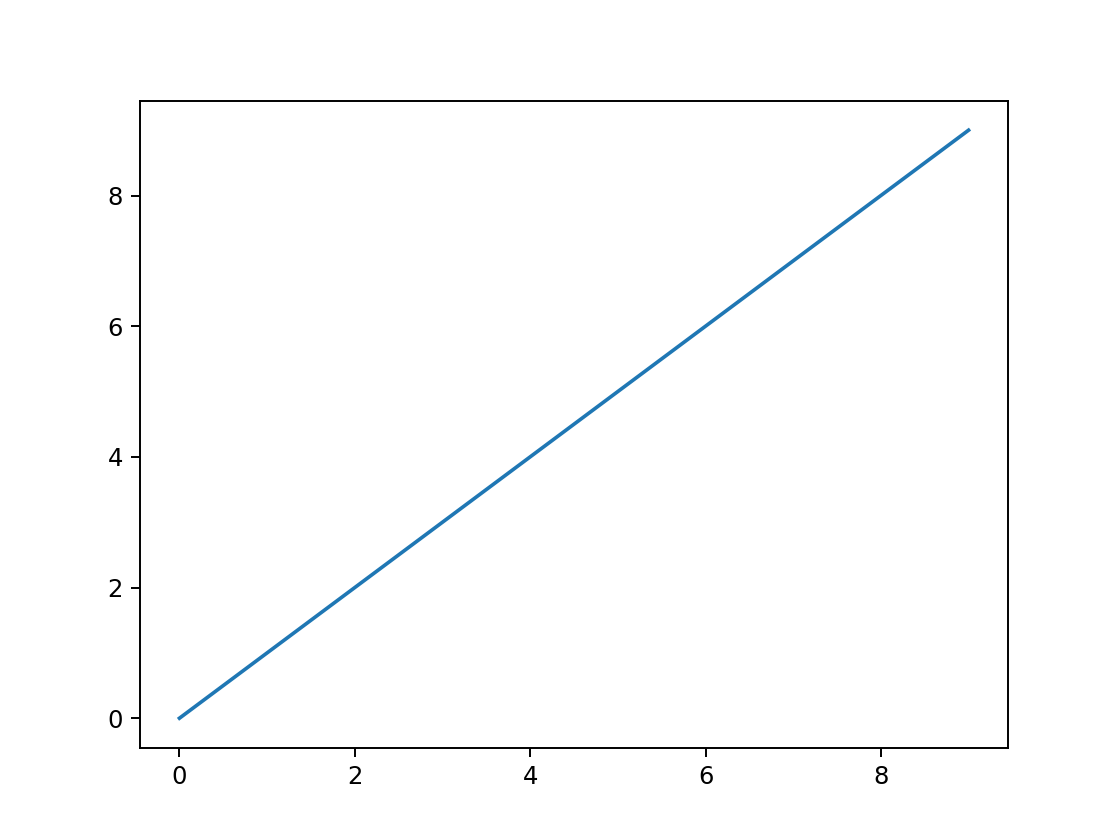

In [12]:
plt.plot(data)

### 9.1.1 図とサブプロット

Matplotlibのプロット機能は``Figure``オブジェクトに含まれている。新たな図を作成するには``plt.figure``を使う。

<IPython.core.display.Javascript object>


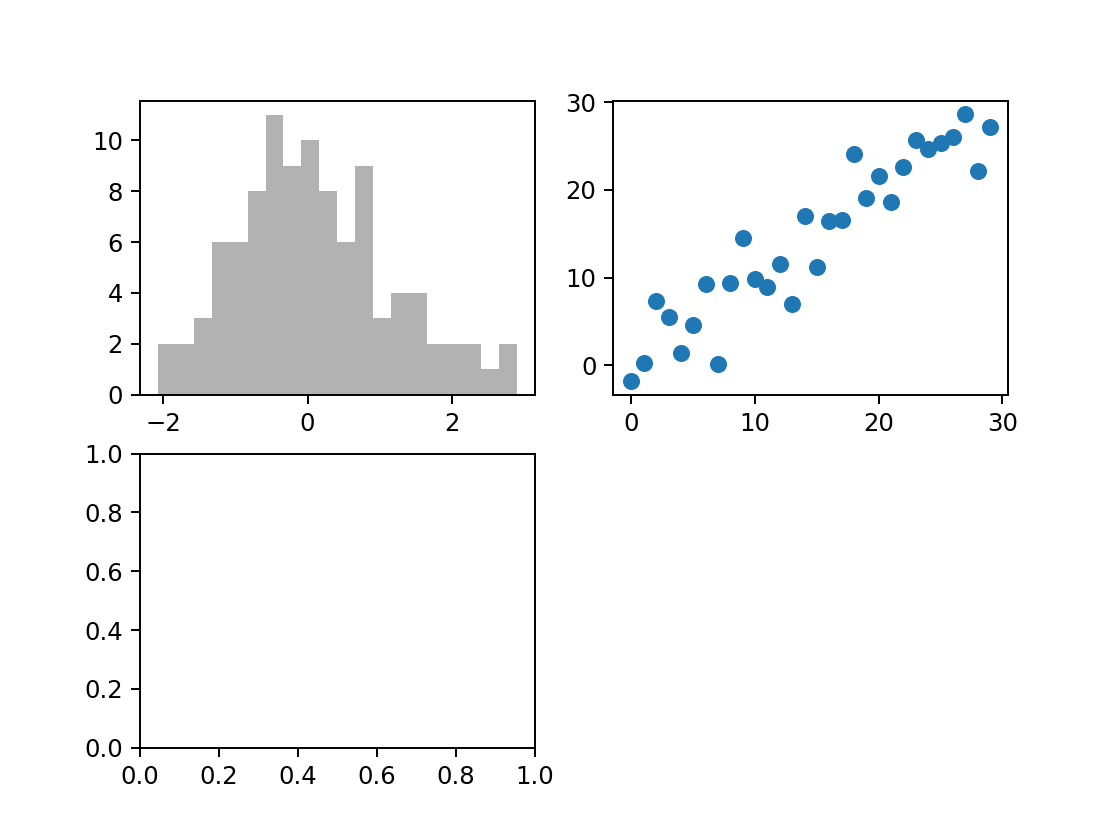

In [13]:
fig = plt.figure()

空の図にはプロットできず、``add_subplot``を使ってサブプロット（1つのグラフを書く領域のこと）を1つ以上作る必要がある。次の最初の文は、図のレイアウトを2×2にして、4つのサブプロットのうち最初のものを選択するという意味である。

In [14]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

これらのオブジェクト（``ax3``など）はそれぞれ``AxesSubplot``オブジェクトであり、空のサブプロットそれぞれに対応する``AxesSubplot``オブジェクトのインスタンスメソッドを呼び出せば、それらのサブプロットに直接プロットすることができる。

In [15]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

サブプロットを格子状に配置した図を作成するのは非常によくあることであり、それをするための便利なMatplotlibのメソッドに``plt.subplots``がある。このメソッドは新たな図を作成し、その中にサブプロットオブジェクトを作成した上で、それらのサブプロットオブジェクトを要素に持つNumPyの配列を戻す。

<IPython.core.display.Javascript object>


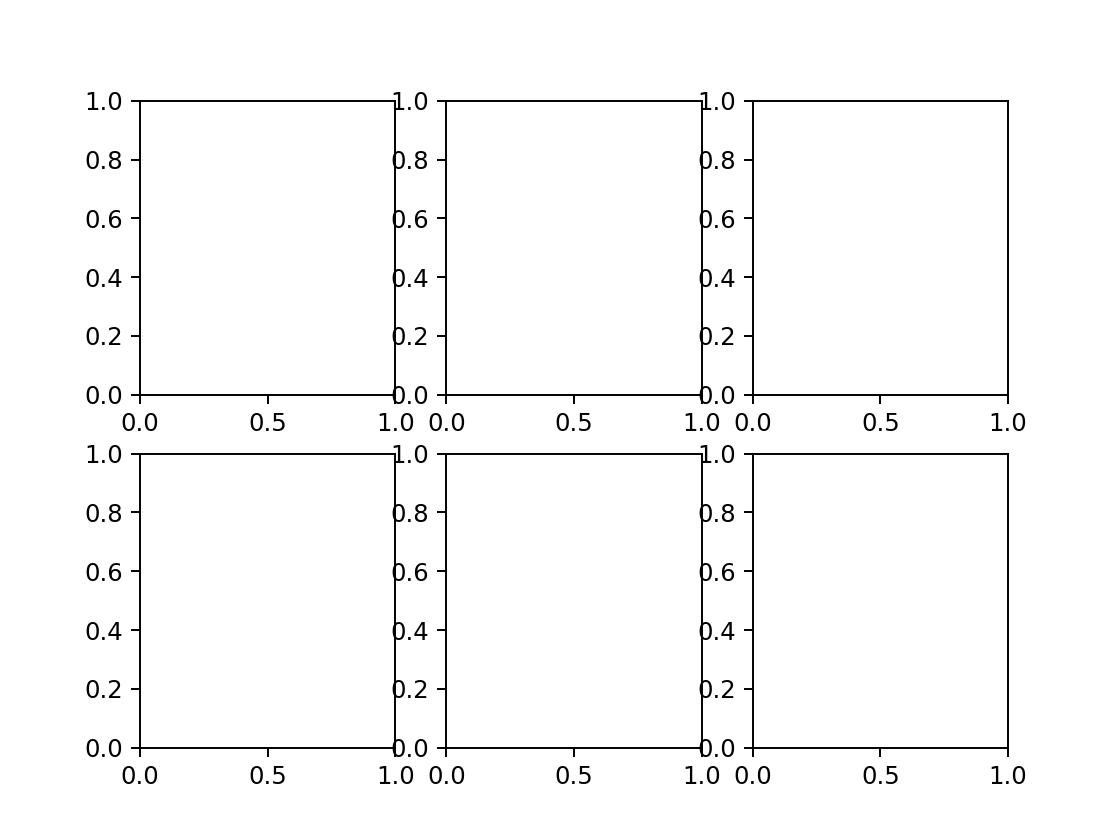

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000118F0BA84A8>,
      dtype=object)

In [16]:
fig, axes = plt.subplots(2, 3)

axes

この方法が便利な点は、軸の配列``axes``に対して、2次元配列のようなインデックスを簡単に付けられるところにある（例えば``axes[0, 1]``のように）。また、``sharex, sharey``を用いて、すべてのサブプロットに同じX軸とY軸を設定することも可能である。このオプションは、同じスケールでデータを比較するときに特に有用である。

Matplotlibを使うと、デフォルトではサブプロットのまわりにかなりの余白ができ、サブプロット間にもかなりのスペースが空く。これは``Figure``オブジェクトの``subplots_adjust``メソッドを使うことで調節できる。``wspace``と``hspace``はそれぞれ図の幅と高さのうちサブプロット間のスペースとして使う領域の割合の指定である。

<IPython.core.display.Javascript object>


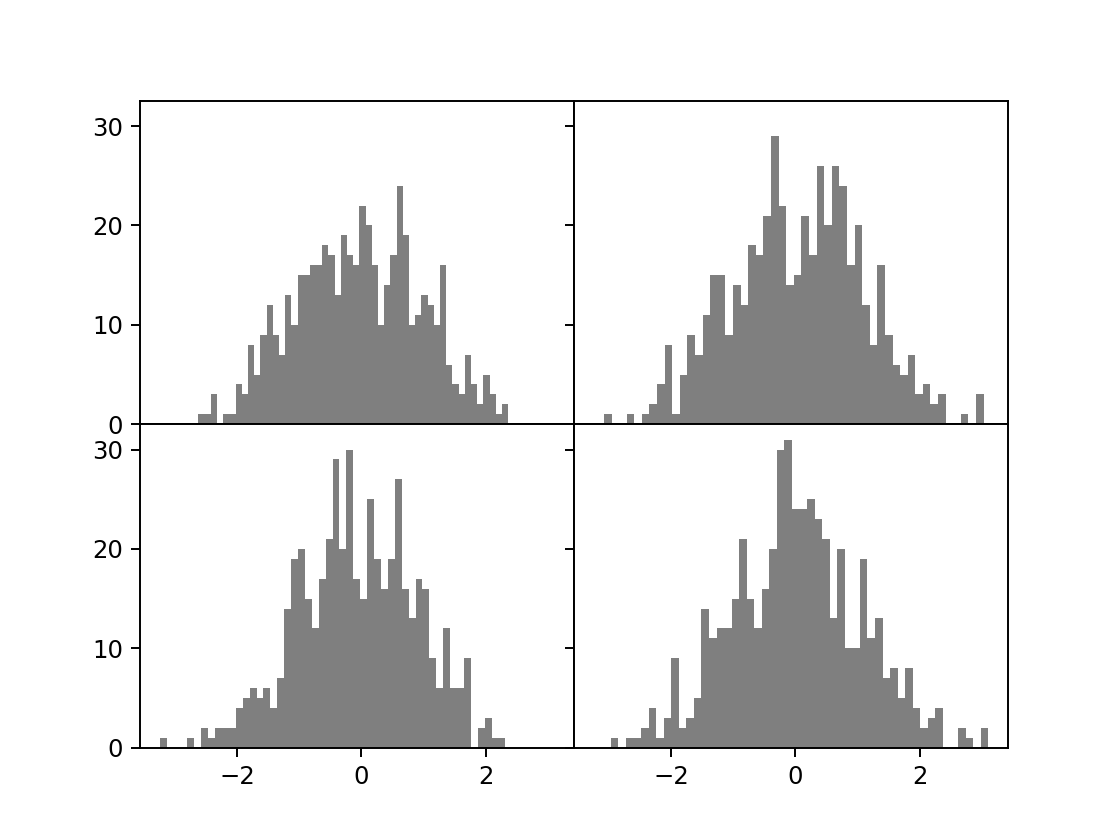

In [22]:
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 9.1.2 色、マーカー、線種

Matplotlibの主要な``plot``関数にはX座標とY座標の配列を引数として渡すが、さらにオプションで、色や線種を指定することもできる。折れ線グラフには実際のデータ点を目立たせるためのマーカーも付けられる。

<IPython.core.display.Javascript object>


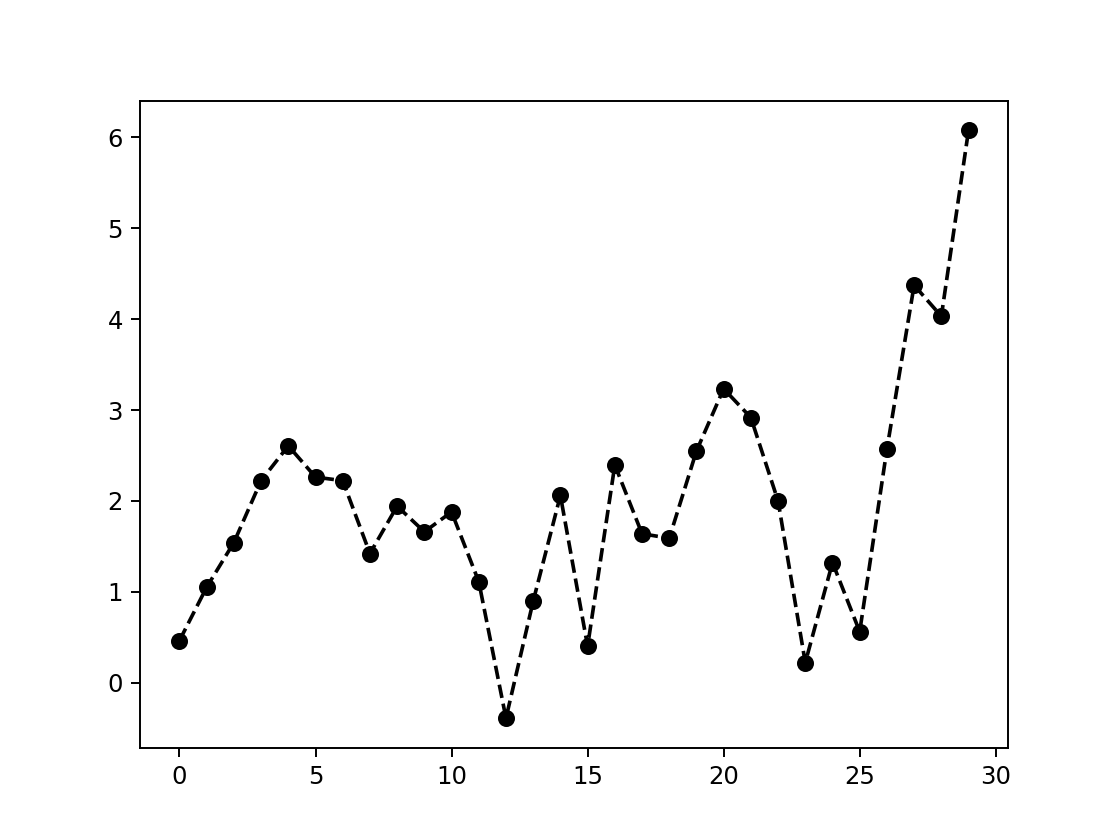

In [24]:
from numpy.random import randn

fig, axes = plt.subplots(1, 1)
axes.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

デフォルトでは折れ線グラフの点は直線で結ばれるが、``drawstyle``オプションを使って変更できる。さらに、次の例ではいくつかの新しい情報がある：出力のコマンドはそのコマンドで追加されたプロットの構成要素を参照するオブジェクトを表しているが無視してよい、次の実行例では``plot``に``label``引数を渡しているため、``plt.legend``を用いてプロットの各線を識別するための凡例を作成できる。

<IPython.core.display.Javascript object>


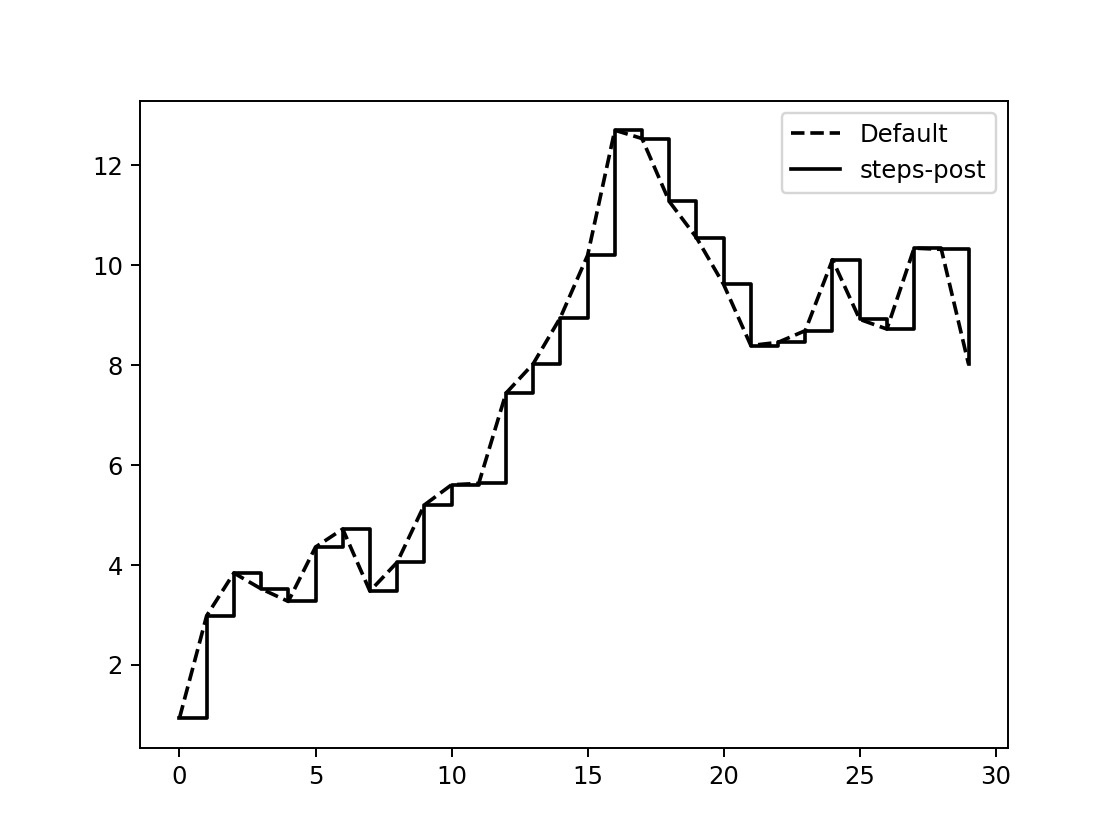

In [27]:
fig, axes = plt.subplots(1, 1)

data = np.random.randn(30).cumsum()
plt.plot(data, color='k', linestyle='dashed', label='Default')
plt.plot(data, color='k', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### 9.1.3 目盛り、ラベル、凡例

大抵のプロットの装飾には、実現する方法が2通りある。手続き的な``pyplot``インターフェースを使う方法と、もっとオブジェクト指向的なMatplotlibネイティブなAPIを使う方法である。これらの使い分けは好みであるが、サブプロットのインスタンスメソッドを使うのがコードが明確になる（特に複数のサブプロットを扱う際に対象を明示できる）。

In [40]:
# 線種のdocstring: plt.plot?
# 凡例のdocstring: ax.legend?

<IPython.core.display.Javascript object>


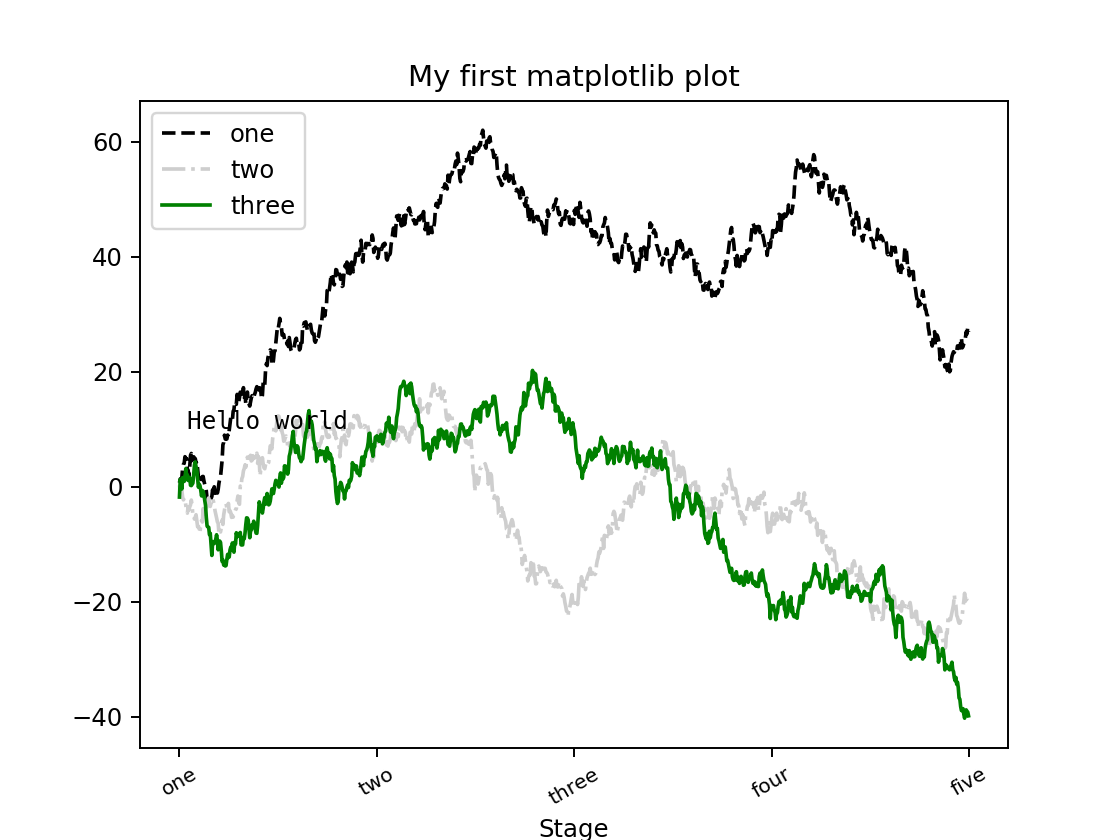

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), color='k', linestyle='dashed', label='one')
ax.plot(np.random.randn(1000).cumsum(), color='#CECECE', linestyle='-.', label='two')
ax.plot(np.random.randn(1000).cumsum(), color='g', label='three')
ax.legend(loc='best')

X軸の目盛りを変更するには、``set_xticks``と``set_xticklabels``を使うのが最も簡単である。前者はMatplotlibに、データ範囲のどこに目盛りを入れるかを指示する。デフォルトでは、目盛りと同じ値にラベルも表示されるように設定されるが、``set_xticklabels``を用いればどんな
値でもラベルとして設定できる。次ではさらにX軸の目盛りにつけるラベルを30度回転させている。

In [42]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

``set_xlabel``でX軸につける名前を指定し、``set_title``でサブプロットのタイトルを指定する。

In [43]:
ax.set_xlabel('Stage')
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

なお、軸のクラス（``AxesSubplot``）には``set``メソッドがあり、プロットの属性を一括設定できる。例えば前の例と同じことをする場合には次のようにも書ける：

In [35]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 22.084406216984554, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

凡例の追加は、各データのプロットの追加の際に``label``引数を指定し``ax.legend()``を呼び出す方法が最も簡単である。

### 9.1.4 サブプロットへの注釈や描画

標準的な形でのプロットに加えて、テキストや矢印、その他さまざまな形状の独自の注釈をプロットにつけたいことがある。注釈やテキストは``text``や``arrow``、``annotate``といった関数を用いてプロットに追加できる。

``text``はプロット上の指定した座標``(x, y)``にオプションで指定されたスタイルでテキストを描画できる。

In [48]:
# ax.text(x, y, 'Hello world', family='monospace', fontsize=10)

注釈（``annotate``）を使うと、テキストと矢印をうまく調節して描画できる。例として2007年以降のS&P500インデックスの終値をプロットし、2008年から2009年にかけての金融危機における重要な日付のうちいくつかに注釈をいれてみる。次では、``ax.annotate``の``xytext``でラベルの位置を、``xy``引数でラベルから伸びる矢印の終点をそれぞれ指定している。

In [61]:
import matplotlib.dates as dates
from datetime import datetime

# # 日本語フォントの設定
# font_options = {'family': 'TakaoGothic'}
# plt.rc('font', **font_options)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, linestyle='-', color='k')
crisis_data = [
    (datetime(2007, 10, 11), '上昇相場のピーク'),
    (datetime(2008, 3, 12), 'ベア・スターンズ危機'),
    (datetime(2008, 9, 15), 'リーマン破綻')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top'
               )

# X軸のラベルの日付表記を日本語に
datefmt = dates.DateFormatter('%Y年%m月')
ax.xaxis.set_major_formatter(datefmt)

# 2007~2010年をズーム
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('2008~2009年の金融危機の重要な日付')

Text(0.5, 1.0, '2008~2009年の金融危機の重要な日付')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000028C0BB8CD08> (for post_execute):


UnicodeEncodeError: 'locale' codec can't encode character '\u5e74' in position 2: encoding error

UnicodeEncodeError: 'locale' codec can't encode character '\u5e74' in position 2: encoding error

<Figure size 432x288 with 1 Axes>

### 9.1.5 プロットのファイルへの保存

アクティブな図は``plt.savefig``を使ってファイルに保存できる。このメソッドは``Figure``オブジェクトのインスタンスメソッド``savefig``とも等価である。例えば、図をSVGで保存する場合は次のように入力するだけである。

ファイル形式はファイルの拡張子から推測される。したがって、``.svg``でなく``.pdf``とした場合はPDFが出力される。また、よく使うオプションに``dpi``と``bbox_inches``がある。前者は1インチあたりのドット数（dots per inch）を指定するものであり、後者は図の本体周りの空白を取り除ける。

In [62]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [63]:
# 保存をPNGで、周りの空白を最小に
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## 9.2 pandasとseabornのプロット関数 

In [64]:
tips = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv')

In [65]:
macro = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv')

### 9.2.1 折れ線グラフ

シリーズやデータフレームにはそれぞれ、いくつかの基本的な形式のプロットをするための``plot``属性がある。

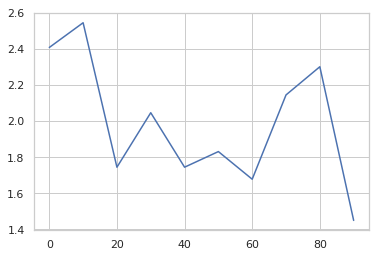

In [67]:
# font_options = {'family': 'DejaVu Sans'}
# plt.rc('font', **font_options)

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

データフレームの``plot``メソッドは、1つのサブプロット上に各列を異なる折れ線でプロットし、凡例を自動生成する。プロットの種類は``kind``パラメータで調節することができる。

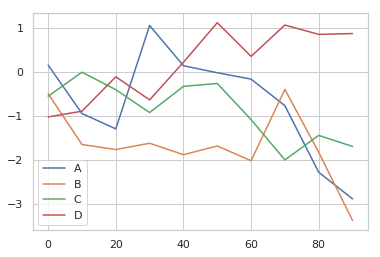

In [68]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()

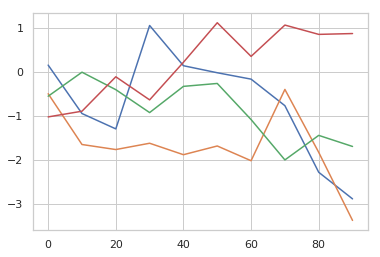

In [69]:
df.plot(kind='line', legend=False)

### 9.2.2 棒グラフ

``plot.bar()``と``plot.barh()``を使うと、それぞれ縦棒と横棒の棒グラフを描ける。この場合、シリーズやデータフレームのインデックスはX軸（``bar``）やY軸（``barh``）の目盛りとして使われる。

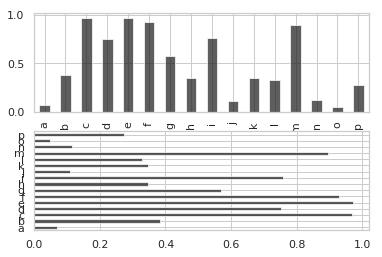

In [70]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)

data.plot(ax=axes[1], kind='barh', color='k', alpha=0.7)

データフレームから棒グラフを描いた場合、各行の値は棒のグループとしてまとめて並べられる。積み上げ棒グラフは、データフレームに対して``stacked=True``を与えてプロットすれば作れる。

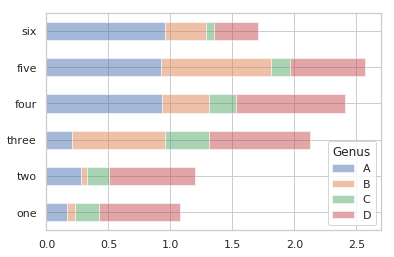

In [71]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot(kind='barh', stacked=True, alpha=0.5)

棒グラフの便利な使い道としては、``value_counts``を用いて集計したシリーズの値の頻度の可視化が挙げられる。すなわち``s.value_counts().plot.bar()``のようにする。

次にチップのデータを使って可視化を行う。各曜日の各団体の人数について、データ点の割合を表示する積み上げ棒グラフを作りたいとする。つまり、曜日と団体の人数でクロス集計する。

In [72]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


クロス集計したら、各行の合計が1になるように正規化し、プロットする。

In [73]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


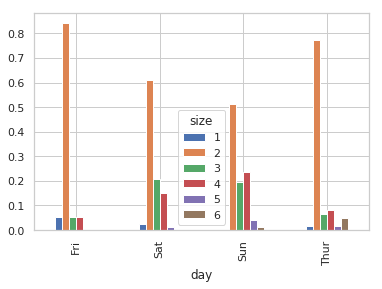

In [74]:
party_pcts.plot(kind='bar')

グラフからは、このデータセットでは団体の人数は週末に増えているようだとわかる。

プロットの前に集計や可視化を必要とするデータについては、``seaborn``パッケージを使用すると非常にシンプルに可視化できる。seabornのプロット関数には``data``という引数があり、そこにpandasのデータフレームを指定できる。それ以外の``x``や``y``という引数には、データフレームの列の名前を指定する。

In [75]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


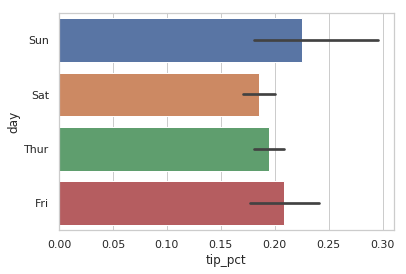

In [76]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

``seaborn.barplot``には``hue``というオプションがある。このオプションにカテゴリ型データを指定すると、カテゴリごとに分けて集計できる。

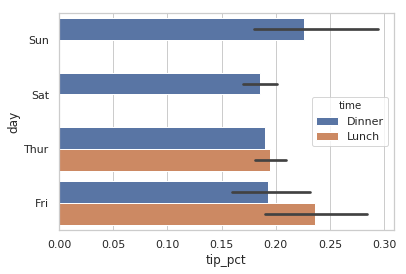

In [77]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

デフォルトのカラーパレットやプロットの背景色、グリッド線の色など、seabornはプロットの見た目の美しさを自動的に変更する。``seaborn_set``を用いるとプロットの見た目を別のものに変えることができる。

In [78]:
sns.set(style='whitegrid')

### 9.2.3 ヒストグラムと密度プロット

ヒストグラムは棒グラフの一種であり、値の頻度を離散データとして表示する。各データ点は等間隔に置かれた個々のビンに分けて入れられ、各ビンの中のデータ点の数がプロットされる。

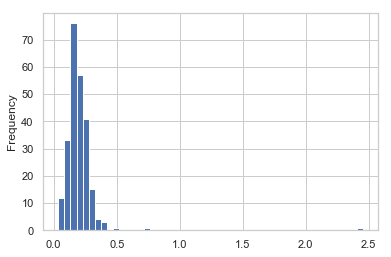

In [79]:
tips['tip_pct'].plot(kind='hist', bins=50);

関連するプロット形式として密度プロットがある。これはカーネル密度推定（KDE）プロットとも呼ばれる。``plot.kde``を使うと、一般的な混合正規分布カーネル密度推定を用いた密度プロットを作成できる。

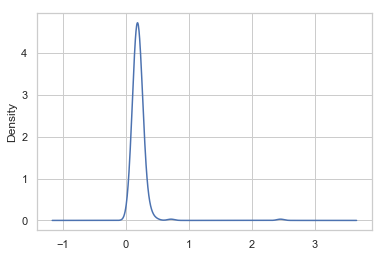

In [80]:
tips['tip_pct'].plot(kind='density');

seabornの``distplot``メソッドでは、ヒストグラムと連続型の密度推定の両方のプロットを同時に作成できる。

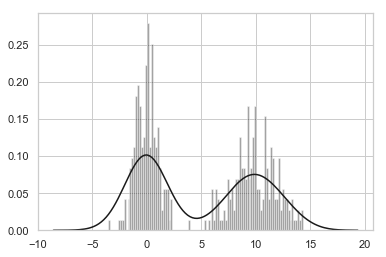

In [81]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k');

### 9.2.4 散布図

散布図は2つの1次元データ（シリーズ）の間の相関を調べるのに有効な場合がある。ここでは例としてstatsmodelsプロジェクトの``macrodata``データセットを読み込み、いくつかの変数を選択してそれらの対数の差分を計算する。

In [82]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


読み込んだら、seabornの``regplot``メソッドを使う。``regplot``メソッドは散布図を作成し、線形回帰により回帰直線をあてはめる。

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

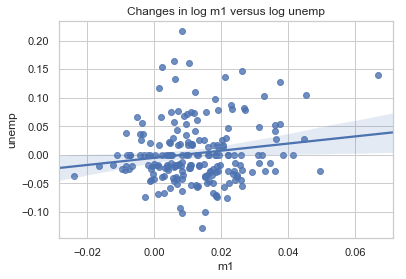

In [83]:
sns.regplot('m1', 'unemp', data=trans_data);
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

``pairplot``関数は、散布図行列の対角線上に各変数のヒストグラムや密度推定を描くのもサポートしている。次では``plot_kws``というキーワード引数を使っているが、これにより対角線上以外の要素について、個々のプロット機能を呼び出す際に設定オプションを渡すことが可能である（対角線要素は``diag_kws``で設定できる）。

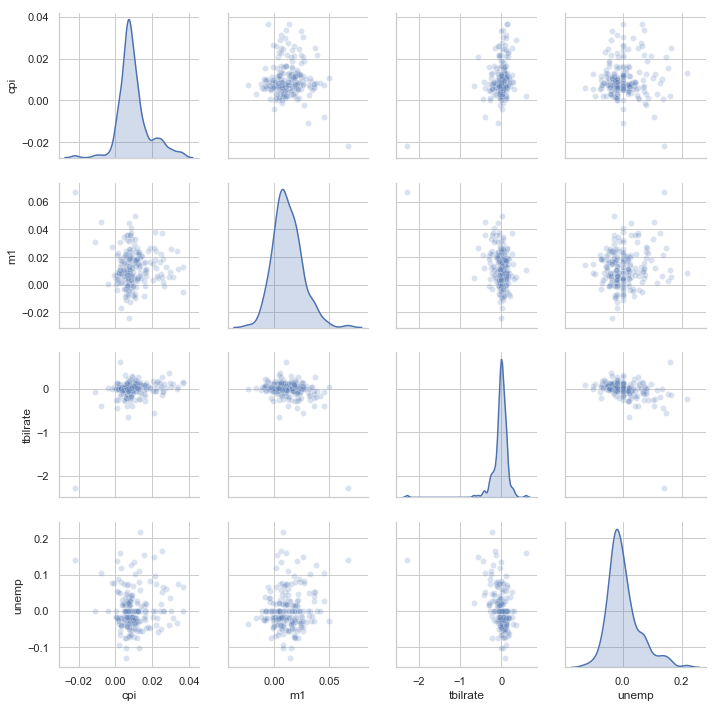

In [84]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 9.2.5 ファセットグリッドとカテゴリ型データ

多くのカテゴリ変数を含んだデータを可視化する方法の1つは、特定の属性値でまとめ、並べて表示できる**ファセットグリッド**を使うことである。seabornには、さまざまなファセットプロットを簡単に作ることができる``factorplot``という便利な組み込みの関数がある。

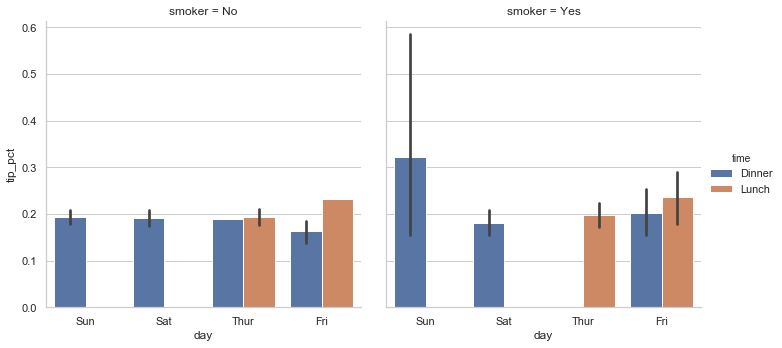

In [85]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips)

ここでは2つのファセット（smoker=Noとsmoker=Yes）を表示し、それぞれのファセット内で棒の色を変えることで時間帯（``time``）をまとめているが、代わりに``time``の値ごとに行を追加する形でファセットグリッドを拡張することも可能である。

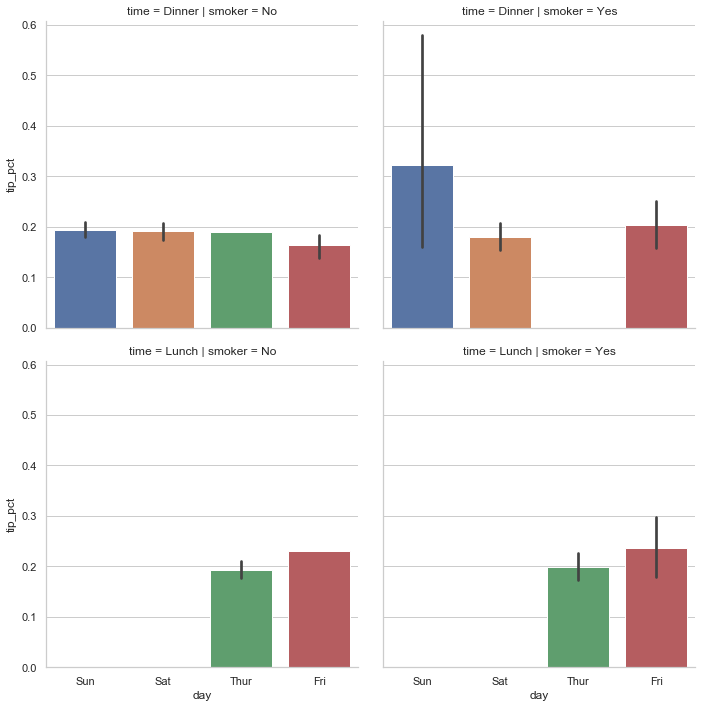

In [86]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips)

表示しようとしているデータによっては、棒グラフ以外のプロット形式の方が便利なこともある。``catplot``は例えば中央値や四分位点、外れ値を表示する箱ひげ図も用意している。

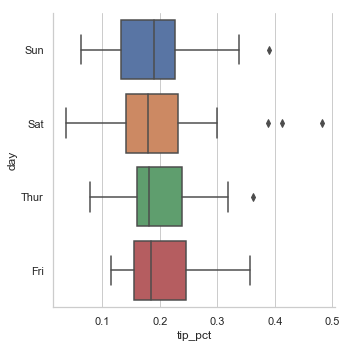

In [87]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

さらに汎用的な``seaborn.FacetGrid``クラスを使えばよりカスタマイズできる。詳しくはseabornのドキュメント（ https://seaborn.pydata.org/ ）を参照されたい。

## Reference

- 実践JupyterNotebook
- Wes McKinney. Pythonによるデータ分析入門. 第2版, 株式会社オライリー・ジャパン, 2018, 571p.